In [2]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [3]:

import gc
def loadXST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
        try:
         D=np.array(f[s]['values'])
         D2.append(D[:,sis][sis])
        except:
            continue;
    D2=np.array(D2)
    return D2


In [4]:
dhours=[]
dcnt=[]
opath='xst_mean'
fpath='xst'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    for fn in files:
        ext=fn.split('.')[-1]
#    if ext!='h5': continue;
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        fhour=ftime[:-3]
#        print(band,ftime,fhour)
        if fhour in dhours: 
            dcnt[dhours.index(fhour)]+=1;
        else:
            dhours.append(fhour)
            dcnt.append(1)
print(dhours,dcnt)

35840
['2022-07-08-15', '2022-07-08-16', '2022-07-08-17', '2022-07-08-18', '2022-07-08-19', '2022-07-08-20', '2022-07-08-21', '2022-07-08-22', '2022-07-08-23', '2022-07-09-00', '2022-07-09-01', '2022-07-09-02', '2022-07-09-03', '2022-07-09-04', '2022-07-09-05', '2022-07-09-06', '2022-07-09-07', '2022-07-09-08', '2022-07-09-09', '2022-07-09-10', '2022-07-09-11', '2022-07-09-12', '2022-07-09-13', '2022-07-09-14', '2022-07-09-15', '2022-07-09-16', '2022-07-09-17', '2022-07-09-18', '2022-07-09-19', '2022-07-09-20', '2022-07-09-21', '2022-07-09-22', '2022-07-09-23', '2022-07-10-00', '2022-07-10-02', '2022-07-10-03', '2022-07-10-04', '2022-07-10-05', '2022-07-10-06', '2022-07-10-07', '2022-07-10-08', '2022-07-10-09', '2022-07-10-10', '2022-07-10-11', '2022-07-10-12', '2022-07-10-13', '2022-07-10-14', '2022-07-10-15', '2022-07-10-16', '2022-07-10-17', '2022-07-10-18', '2022-07-10-19', '2022-07-10-20', '2022-07-10-21', '2022-07-10-22', '2022-07-10-23', '2022-07-11-00', '2022-07-11-01', '2022-0

In [5]:
sis=[i for i in range(18)]
nsi=len(sis)

for shour in dhours:
    day=int(shour[8:8+2])
    hour=int(shour[11:11+2])
#    if day<24: continue;
#    if hour<12: continue;
    print(shour,day,hour)
#    continue;
    xst=np.zeros([512,nsi,nsi],dtype='complex')
    cnt=np.zeros([512],dtype='int')
    for fn in files:
        ext=fn.split('.')[-1]
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        fhour=ftime[:-3]
        if fhour!=shour: continue;
        D=loadXST(fpath+"/"+fn,sis);
        cnt[band]+=D.shape[0];
        xst[band]+=D.sum(axis=0);
    xst/=cnt[:,np.newaxis,np.newaxis];
    np.savez(opath+"/xst_mean_"+shour,xst=xst,cnt=cnt)


2022-07-08-15 8 15
2022-07-08-16 8 16
2022-07-08-17 8 17
2022-07-08-18 8 18
2022-07-08-19 8 19
2022-07-08-20 8 20
2022-07-08-21 8 21
2022-07-08-22 8 22
2022-07-08-23 8 23
2022-07-09-00 9 0
2022-07-09-01 9 1
2022-07-09-02 9 2
2022-07-09-03 9 3
2022-07-09-04 9 4
2022-07-09-05 9 5
2022-07-09-06 9 6
2022-07-09-07 9 7
2022-07-09-08 9 8
2022-07-09-09 9 9
2022-07-09-10 9 10
2022-07-09-11 9 11
2022-07-09-12 9 12
2022-07-09-13 9 13
2022-07-09-14 9 14
2022-07-09-15 9 15
2022-07-09-16 9 16
2022-07-09-17 9 17
2022-07-09-18 9 18
2022-07-09-19 9 19
2022-07-09-20 9 20
2022-07-09-21 9 21
2022-07-09-22 9 22
2022-07-09-23 9 23
2022-07-10-00 10 0


/tmp/ipykernel_89320/454005478.py:23: RuntimeWarning: invalid value encountered in true_divide
  xst/=cnt[:,np.newaxis,np.newaxis];


2022-07-10-02 10 2
2022-07-10-03 10 3
2022-07-10-04 10 4
2022-07-10-05 10 5
2022-07-10-06 10 6
2022-07-10-07 10 7
2022-07-10-08 10 8
2022-07-10-09 10 9
2022-07-10-10 10 10
2022-07-10-11 10 11
2022-07-10-12 10 12
2022-07-10-13 10 13
2022-07-10-14 10 14
2022-07-10-15 10 15
2022-07-10-16 10 16
2022-07-10-17 10 17
2022-07-10-18 10 18
2022-07-10-19 10 19
2022-07-10-20 10 20
2022-07-10-21 10 21
2022-07-10-22 10 22
2022-07-10-23 10 23
2022-07-11-00 11 0
2022-07-11-01 11 1
2022-07-11-02 11 2
2022-07-11-03 11 3
2022-07-11-04 11 4
2022-07-11-05 11 5
2022-07-11-06 11 6
2022-07-11-07 11 7
2022-07-11-08 11 8
2022-07-11-09 11 9
2022-07-11-10 11 10
2022-07-11-11 11 11
2022-07-11-12 11 12
2022-07-11-13 11 13


OSError: Unable to open file (truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048)

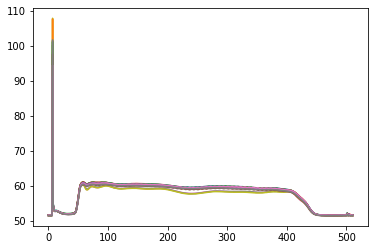

In [5]:
for si in sis:
    plt.plot(10*np.log10(np.abs(xst[:,si,si])))

In [6]:
def LoadFiles(fpath):
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    return
    Data=[]
    Bands=[]
    for f in files:
        ext=f.split('.')[-1]
        if ext!='h5': continue;
        s=f.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        try:
         D=loadXST(join(fpath,f));
         D=np.array(D)
         print("band=",band," time=",ftime," Data size=",D.shape)
         Bands.append(band)
         Data.append(D)
        except:
         print('Can not open',f)
        gc.collect()
    return Bands,Data
